# Case Study : Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.



## Business Goal 

In this project, We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. 

## Case Study Approach-<br>
   
##### 1. Loading, Reading and Understanding the data
   * Loading the dataset
   * Checking Structure of data sets
   * Checking other attributes like using info(), describe(), etc 
   
##### 2. Data Cleaning
   * Deleting unnecessary columns and rows
   * Data Quality check - Analysing missing values, improper dtypes, duplicated rows
   * Imputing Missing values 
   * Changing improper data types
   
##### 3. Handling Outliers
   
##### 4. Data Analysis
   * Imbalance Analysis
   * Defining functions for plotting
   * Univariate analysis of each variable 
   
##### 5. Data Preparation
   * Dummy Variable Creation
   * Train Test Split
   * Feature Scaling
   * Loking at correlations
   
##### 6. Data Modelling
   
##### 7. Model Evaluation
   * Calculating important metrics (sensitivity, specificity, recall, precision, F1-score, etc)
   * Ploting ROC curve
   * ploting precision ans recall trade off
   * finding optimal cut off probability
   * Making predictions using test dataset
   
##### 8. Final Observations and Summary

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Displaying Max Rows and Max Columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',600)
pd.set_option('display.width', None)

#  Loading, Reading and Understanding the data

In [4]:
# Reading the Data Dictionary
Telecom_datadict=pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx", usecols=[0,1])
Telecom_datadict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [5]:
# Loading the Dataset using Pandas
Telecom=pd.read_csv("telecom_churn_data.csv")
Telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# The .info() command gives almost the entire information that needs to be inspected. So,Let's start from there.
Telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
# Description of the data in the dataframe to get an idea of all Variables.
Telecom.describe(include="all")

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [8]:
# Shape of Dataset(Rows, Columns)
Telecom.shape

(99999, 226)

In [9]:
# Creating a copy of the Data incase it is required later.
Telecom_df = Telecom.copy()

#  Data Cleaning

In [10]:
# Checking for duplicate Rows in the datasets
Telecom_df.duplicated().sum()
# No Duplicated rows are present

0

## Handling missing values

#### Handling missing values in columns

In [11]:
# Checking the Percentage of Missing Values in each Column
Telecom_missing_cols= (round(100*(Telecom_df.isnull().sum().sort_values(ascending=False)/len(Telecom_df)),2).to_frame("null"))
Telecom_missing_cols

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


In [12]:
# Looking in Columns having Missing Values greater than 30 percent.
Telecom_col_list_missing30 =list(Telecom_missing_cols.index[Telecom_missing_cols["null"]>30])
Telecom_col_list_missing30

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [13]:
# Deleting the columns having more than 30 percent missing values.
Telecom_df = Telecom_df.drop(Telecom_col_list_missing30, axis=1)

In [14]:
# Shape of Dataset(Rows, Columns)
Telecom_df.shape

(99999, 186)

### Deleting the Date columns as the Date columns are not required in our analysis

In [15]:
# List the date columns
Telecom_date_cols = [i for i in Telecom_df.columns.to_list() if 'date' in i]
print(Telecom_date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [16]:
# Dropping date columns
Telecom_df = Telecom_df.drop(Telecom_date_cols, axis=1)

We are Dropping "circle_id" column as this column has only one unique value. Hence, there will be no impact of this column on our data analysis.

In [17]:
# Dropping circle_id column.
Telecom_df = Telecom_df.drop("circle_id" , axis=1)

In [18]:
# Shape of Dataset(Rows, Columns)
Telecom_df.shape

(99999, 177)

## Filter "High-Value customers"


In churn prediction, we assume that there are three phases of the customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

As mentioned above, we need to predict churn only for high-value customers.

Defination:

High Value Customer: Those who have recharged with an amount more than or equal to X_70, where X_70 is the 70th percentile of the average recharge amount in the first two months (the good phase).

#### Creating a column "Avg_rech_amt_6_7" by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [19]:
Telecom_df["Avg_rech_amt_6_7"] = (Telecom_df["total_rech_amt_6"] + Telecom_df["total_rech_amt_7"])/2

In [20]:
# Checking the head of "Avg_rech_amt_6_7"
Telecom_df["Avg_rech_amt_6_7"].head() 

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: Avg_rech_amt_6_7, dtype: float64

#### Finding the 70th percentile of the "Avg_rech_amt_6_7"

In [21]:
X_70 = Telecom_df["Avg_rech_amt_6_7"].quantile(0.70)
X_70

368.5

#### Filtering the customers, Who have recharged more than or equal to X_70.

In [22]:
Telecom_df = Telecom_df[Telecom_df["Avg_rech_amt_6_7"] >= X_70]

#Checking the head
Telecom_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,2

In [23]:
# Shape of Dataset(Rows, Columns)
Telecom_df.shape

(30011, 178)

From the shape of "Telecom_df", we can see that we have around ***~30K*** rows after filtering it.

#### Handling missing values in rows

In [24]:
# Count the Rows having more than 50 percent Missing values.
Telecom_df_missing_rows_50 = Telecom_df[(Telecom_df.isnull().sum(axis=1)) > (len(Telecom_df.columns)//2)]
Telecom_df_missing_rows_50.shape

(114, 178)

In [25]:
# Now deleting the Rows having more than 50 percent Missing values.
Telecom_df = Telecom_df.drop(Telecom_df_missing_rows_50.index)
Telecom_df.shape

(29897, 178)

In [26]:
# Again Checking the Percentage of Missing Values in each Column.
Telecom_missing_cols= (round(100*(Telecom_df.isnull().sum().sort_values(ascending=False)/len(Telecom_df)),2).to_frame("null"))
Telecom_missing_cols

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2c_mou_9,5.32
std_ic_t2m_mou_9,5.32
loc_og_mou_9,5.32
std_og_t2t_mou_9,5.32


Looks like "mou" for all the types of calls for the month of "September (9)" have missing values together for any particular record.

Lets check the records for the "mou" for "September(9)", in which these columns have missing values together.

In [27]:
# Listing the columns of mou September(9)
print(((Telecom_missing_cols[Telecom_missing_cols["null"] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [28]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
Telecom_df_null_mou_9 = Telecom_df[(Telecom_df["loc_og_t2m_mou_9"].isnull()) & (Telecom_df["loc_ic_t2f_mou_9"].isnull()) & (Telecom_df["roam_og_mou_9"].isnull()) & (Telecom_df["std_ic_t2m_mou_9"].isnull()) &
  (Telecom_df["loc_og_t2t_mou_9"].isnull()) & (Telecom_df["std_ic_t2t_mou_9"].isnull()) & (Telecom_df["loc_og_t2f_mou_9"].isnull()) & (Telecom_df["loc_ic_mou_9"].isnull()) &
  (Telecom_df["loc_og_t2c_mou_9"].isnull()) & (Telecom_df["loc_og_mou_9"].isnull()) & (Telecom_df["std_og_t2t_mou_9"].isnull()) & (Telecom_df["roam_ic_mou_9"].isnull()) &
  (Telecom_df["loc_ic_t2m_mou_9"].isnull()) & (Telecom_df["std_og_t2m_mou_9"].isnull()) & (Telecom_df["loc_ic_t2t_mou_9"].isnull()) & (Telecom_df["std_og_t2f_mou_9"].isnull()) & 
  (Telecom_df["std_og_t2c_mou_9"].isnull()) & (Telecom_df["og_others_9"].isnull()) & (Telecom_df["std_og_mou_9"].isnull()) & (Telecom_df["spl_og_mou_9"].isnull()) & 
  (Telecom_df["std_ic_t2f_mou_9"].isnull()) & (Telecom_df["isd_og_mou_9"].isnull()) & (Telecom_df["std_ic_mou_9"].isnull()) & (Telecom_df["offnet_mou_9"].isnull()) & 
  (Telecom_df["isd_ic_mou_9"].isnull()) & (Telecom_df["ic_others_9"].isnull()) & (Telecom_df["std_ic_t2o_mou_9"].isnull()) & (Telecom_df["onnet_mou_9"].isnull()) & 
  (Telecom_df["spl_ic_mou_9"].isnull())]

Telecom_df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4

In [29]:
Telecom_df_null_mou_9.shape

(1590, 178)

In [30]:
# Delete the records for which mou for September(9) are null.
Telecom_df = Telecom_df.drop(Telecom_df_null_mou_9.index)

In [31]:
# Again Checking the Percentage of Missing Values in each Column.
Telecom_missing_cols= (round(100*(Telecom_df.isnull().sum().sort_values(ascending=False)/len(Telecom_df)),2).to_frame("null"))
Telecom_missing_cols

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
loc_og_t2t_mou_8,0.55
std_ic_t2f_mou_8,0.55
std_og_t2m_mou_8,0.55
loc_og_t2m_mou_8,0.55


Looks like "mou" for all the types of calls for the month of "August(8)" have missing values together for any particular record.

Lets check the records for the "mou for August(8)", in which these coulmns have missing values together.

In [32]:
# Listing the columns of mou August(8)
print(((Telecom_missing_cols[Telecom_missing_cols['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [33]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
Telecom_df_null_mou_8 = Telecom_df[(Telecom_df["loc_og_t2m_mou_8"].isnull()) & (Telecom_df["loc_ic_t2f_mou_8"].isnull()) & (Telecom_df["roam_og_mou_8"].isnull()) & (Telecom_df["std_ic_t2m_mou_8"].isnull()) &
  (Telecom_df["loc_og_t2t_mou_8"].isnull()) & (Telecom_df["std_ic_t2t_mou_8"].isnull()) & (Telecom_df["loc_og_t2f_mou_8"].isnull()) & (Telecom_df["loc_ic_mou_8"].isnull()) &
  (Telecom_df["loc_og_t2c_mou_8"].isnull()) & (Telecom_df["loc_og_mou_8"].isnull()) & (Telecom_df["std_og_t2t_mou_8"].isnull()) & (Telecom_df["roam_ic_mou_8"].isnull()) &
  (Telecom_df["loc_ic_t2m_mou_8"].isnull()) & (Telecom_df["std_og_t2m_mou_8"].isnull()) & (Telecom_df["loc_ic_t2t_mou_8"].isnull()) & (Telecom_df["std_og_t2f_mou_8"].isnull()) & 
  (Telecom_df["std_og_t2c_mou_8"].isnull()) & (Telecom_df["og_others_8"].isnull()) & (Telecom_df["std_og_mou_8"].isnull()) & (Telecom_df["spl_og_mou_8"].isnull()) & 
  (Telecom_df["std_ic_t2f_mou_8"].isnull()) & (Telecom_df["isd_og_mou_8"].isnull()) & (Telecom_df["std_ic_mou_8"].isnull()) & (Telecom_df["offnet_mou_8"].isnull()) & 
  (Telecom_df["isd_ic_mou_8"].isnull()) & (Telecom_df["ic_others_8"].isnull()) & (Telecom_df["std_ic_t2o_mou_8"].isnull()) & (Telecom_df["onnet_mou_8"].isnull()) & 
  (Telecom_df["spl_ic_mou_8"].isnull())]

Telecom_df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.

In [34]:
# Delete the records for which mou for August(8) are null.
Telecom_df = Telecom_df.drop(Telecom_df_null_mou_8.index)

In [35]:
# Again Checking the Percentage of Missing Values in each Column.
Telecom_missing_cols= (round(100*(Telecom_df.isnull().sum().sort_values(ascending=False)/len(Telecom_df)),2).to_frame("null"))
Telecom_missing_cols

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_ic_t2m_mou_6,0.44
isd_og_mou_6,0.44
loc_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44


Looks like "mou" for all the types of calls for the month of "June(6)" have missing values together for any particular record.

Lets check the records for the "mou for June(6)", in which these columns have missing values together.

In [36]:
# Listing the columns of "mou June(6)"
print(((Telecom_missing_cols[Telecom_missing_cols['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [37]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
Telecom_df_null_mou_6 = Telecom_df[(Telecom_df["loc_og_t2m_mou_6"].isnull()) & (Telecom_df["loc_ic_t2f_mou_6"].isnull()) & (Telecom_df["roam_og_mou_6"].isnull()) & (Telecom_df["std_ic_t2m_mou_6"].isnull()) &
  (Telecom_df["loc_og_t2t_mou_6"].isnull()) & (Telecom_df["std_ic_t2t_mou_6"].isnull()) & (Telecom_df["loc_og_t2f_mou_6"].isnull()) & (Telecom_df["loc_ic_mou_6"].isnull()) &
  (Telecom_df["loc_og_t2c_mou_6"].isnull()) & (Telecom_df["loc_og_mou_6"].isnull()) & (Telecom_df["std_og_t2t_mou_6"].isnull()) & (Telecom_df["roam_ic_mou_6"].isnull()) &
  (Telecom_df["loc_ic_t2m_mou_6"].isnull()) & (Telecom_df["std_og_t2m_mou_6"].isnull()) & (Telecom_df["loc_ic_t2t_mou_6"].isnull()) & (Telecom_df["std_og_t2f_mou_6"].isnull()) & 
  (Telecom_df["std_og_t2c_mou_6"].isnull()) & (Telecom_df["og_others_6"].isnull()) & (Telecom_df["std_og_mou_6"].isnull()) & (Telecom_df["spl_og_mou_6"].isnull()) & 
  (Telecom_df["std_ic_t2f_mou_6"].isnull()) & (Telecom_df["isd_og_mou_6"].isnull()) & (Telecom_df["std_ic_mou_6"].isnull()) & (Telecom_df["offnet_mou_6"].isnull()) & 
  (Telecom_df["isd_ic_mou_6"].isnull()) & (Telecom_df["ic_others_6"].isnull()) & (Telecom_df["std_ic_t2o_mou_6"].isnull()) & (Telecom_df["onnet_mou_6"].isnull()) & 
  (Telecom_df["spl_ic_mou_6"].isnull())]

Telecom_df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,0.0,

In [38]:
# Delete the records for which mou for June(6) are null.
Telecom_df = Telecom_df.drop(Telecom_df_null_mou_6.index)

In [39]:
# Again Checking the Percentage of Missing Values in each Column.
Telecom_missing_cols= (round(100*(Telecom_df.isnull().sum().sort_values(ascending=False)/len(Telecom_df)),2).to_frame("null"))
Telecom_missing_cols

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
std_og_t2t_mou_7,0.12
std_og_t2f_mou_7,0.12
std_og_t2c_mou_7,0.12
std_og_mou_7,0.12
ic_others_7,0.12


Looks like "mou" for all the types of calls for the month of "July(7)" have missing values together for any particular record.

Lets check the records for the "mou" for "July(7)", in which these columns have missing values together.

In [40]:
# Listing the columns of "mou July(7)"
print(((Telecom_missing_cols[Telecom_missing_cols['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [41]:
# Creating a dataframe with the condition, in which mou for July(7) are null.
Telecom_df_null_mou_7 = Telecom_df[(Telecom_df["loc_og_t2m_mou_7"].isnull()) & (Telecom_df["loc_ic_t2f_mou_7"].isnull()) & (Telecom_df["roam_og_mou_7"].isnull()) & (Telecom_df["std_ic_t2m_mou_7"].isnull()) &
  (Telecom_df["loc_og_t2t_mou_7"].isnull()) & (Telecom_df["std_ic_t2t_mou_7"].isnull()) & (Telecom_df["loc_og_t2f_mou_7"].isnull()) & (Telecom_df["loc_ic_mou_7"].isnull()) &
  (Telecom_df["loc_og_t2c_mou_7"].isnull()) & (Telecom_df["loc_og_mou_7"].isnull()) & (Telecom_df["std_og_t2t_mou_7"].isnull()) & (Telecom_df["roam_ic_mou_7"].isnull()) &
  (Telecom_df["loc_ic_t2m_mou_7"].isnull()) & (Telecom_df["std_og_t2m_mou_7"].isnull()) & (Telecom_df["loc_ic_t2t_mou_7"].isnull()) & (Telecom_df["std_og_t2f_mou_7"].isnull()) & 
  (Telecom_df["std_og_t2c_mou_7"].isnull()) & (Telecom_df["og_others_7"].isnull()) & (Telecom_df["std_og_mou_7"].isnull()) & (Telecom_df["spl_og_mou_7"].isnull()) & 
  (Telecom_df["std_ic_t2f_mou_7"].isnull()) & (Telecom_df["isd_og_mou_7"].isnull()) & (Telecom_df["std_ic_mou_7"].isnull()) & (Telecom_df["offnet_mou_7"].isnull()) & 
  (Telecom_df["isd_ic_mou_7"].isnull()) & (Telecom_df["ic_others_7"].isnull()) & (Telecom_df["std_ic_t2o_mou_7"].isnull()) & (Telecom_df["onnet_mou_7"].isnull()) & 
  (Telecom_df["spl_ic_mou_7"].isnull())]

Telecom_df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,1.50,NaN

In [42]:
# Delete the records for which "mou for July(7)" are null.
Telecom_df = Telecom_df.drop(Telecom_df_null_mou_7.index)

In [43]:
# Again Checking the Percentage of Missing Values in each Column.
Telecom_missing_cols= (round(100*(Telecom_df.isnull().sum().sort_values(ascending=False)/len(Telecom_df)),2).to_frame("null"))
Telecom_missing_cols

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0


So, from above We can see there are no more missing values in any columns.

In [44]:
# Shape of Dataset(Rows, Columns)
Telecom_df.shape

(27991, 178)

In [45]:
# Checking the percentage of Rows we have lost while handling the missing values.
round(100*(1- (len(Telecom_df.index)/30011)),2)

6.73

So,We can see that we have lost almost 7% records. But We have enough number of records to do our further analysis.

## Tag churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [46]:
Telecom_df["churn"] = np.where((Telecom_df["total_ic_mou_9"]==0) & (Telecom_df["total_og_mou_9"]==0) & (Telecom_df["vol_2g_mb_9"]==0) & (Telecom_df["vol_3g_mb_9"]==0), 1, 0)

In [47]:
Telecom_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,

### Deleting all the attributes corresponding to the churn phase

In [48]:
# List the columns for churn month 9 (September)
Telecom_df_col_9 = [col for col in Telecom_df.columns.to_list() if "_9" in col]
print(Telecom_df_col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [49]:
# Delete the churn month columns
Telecom_df = Telecom_df.drop(Telecom_df_col_9, axis=1)

In [50]:
# Dropping the column "sep_vbc_3g".
Telecom_df = Telecom_df.drop("sep_vbc_3g", axis=1)

### Checking churn percentage

In [51]:
round(100*(Telecom_df["churn"].mean()),2)

3.39

There is very little percentage of churn rate. So, We will take care of the class Imbalance later.

# Handling Outliers.

In the filtered "Telecom_df" dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [52]:
Telecom_df["mobile_number"] = Telecom_df["mobile_number"].astype(object)
Telecom_df["churn"] = Telecom_df["churn"].astype(object)

In [53]:
# The .info() command gives almost the entire information that needs to be inspected. So,Let's start from there.
Telecom_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Data columns (total 136 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   

In [54]:
# List only the Numeric Columns.
Telecom_df_numeric_cols = Telecom_df.select_dtypes(exclude=["object"]).columns
print(Telecom_df_numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'Avg_rech_amt_6_7'],
      dtype='object', length=134)


In [55]:
# Checking the Data for Different Percentiles.
Telecom_df[Telecom_df_numeric_cols].describe([0,0.1,0.2,0.4,0.6,0.8,0.9,0.95,0.99,0.993,0.995,0.996,0.997])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_amt_6_7
count,27991.0,27991.0,27991.0,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.0,27991.0,27991.0,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.00000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.0,27991.0,27991.0,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.00000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.00000,27991.000000,27991.000000,27991.000000
mean,0.0,0.0,0.0,582.209777,592.898125,555.317752,294.862547,308.691283,280.309582,416.840220,429.793169,392.600350,17.304377,13.566635,13.734493,28.979050,21.857941,22.112560,96.768751,99.233163,92.155199,185.271861,187.085521,176.879273,7.176921,7.346582,6.832524,1.572376,1.857281,1.774029,289.226508,293.674449,275.875815,186.705576,200.824345,179.596

In [56]:
# Removing the Outliers below 10th and above 90th percentile
for col in Telecom_df_numeric_cols: 
    q1 = Telecom_df[col].quantile(0.10)
    q3 = Telecom_df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    Telecom_df_final = Telecom_df.loc[(Telecom_df[col] > range_low) & (Telecom_df[col] < range_high)]

Telecom_df_final.shape

(27705, 136)

## Derive new features

In [57]:
# List the columns of total "mou", "rech_num" and "rech_amt".
[total for total in Telecom_df_final.columns.to_list() if "total" in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column "decrease_mou_action"
This column indicates whether the minutes of usage of the customer has decreased in the action phase than good phase.

In [58]:
# Total mou at good phase incoming and outgoing
Telecom_df_final["total_mou_good"] = (Telecom_df_final["total_og_mou_6"] + Telecom_df_final["total_ic_mou_6"])

In [59]:
# "Avgerage mou" at action phase
# Taking average because there are two months(7 and 8) in action phase
Telecom_df_final["avg_mou_action"] = (Telecom_df_final["total_og_mou_7"] + Telecom_df_final["total_og_mou_8"] + Telecom_df_final["total_ic_mou_7"] + Telecom_df_final["total_ic_mou_8"])/2

In [60]:
# Difference of "avg_mou_good" and "avg_mou_action"
Telecom_df_final["diff_mou"] = Telecom_df_final["avg_mou_action"] - Telecom_df_final["total_mou_good"]

In [61]:
# On Checking whether the "mou" has decreased in action phase.
Telecom_df_final["decrease_mou_action"] = np.where((Telecom_df_final["diff_mou"] < 0), 1, 0)

In [62]:
# Checking the head of the data
Telecom_df_final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0

#### Deriving the New column "decrease_rech_num_action".
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [63]:
# Average recharge number at action phase
Telecom_df_final["avg_rech_num_action"] = (Telecom_df_final["total_rech_num_7"] + Telecom_df_final["total_rech_num_8"])/2

In [64]:
# Difference of the "total_rech_num_6" and "avg_rech_action".
Telecom_df_final["diff_rech_num"] = Telecom_df_final["avg_rech_num_action"] - Telecom_df_final["total_rech_num_6"]

In [65]:
# On Checking if "rech_num" has decreased in action phase.
Telecom_df_final["decrease_rech_num_action"] = np.where((Telecom_df_final["diff_rech_num"] < 0), 1, 0)

In [66]:
# Checking the head of the data
Telecom_df_final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,7

#### Deriving new column "decrease_rech_amt_action"
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [67]:
 # "Avg rech_amt" in action phase
Telecom_df_final["avg_rech_amt_action"] = (Telecom_df_final["total_rech_amt_7"] + Telecom_df_final["total_rech_amt_8"])/2

In [68]:
# Difference of Action phase rech amt and Good phase rech amt.
Telecom_df_final["diff_rech_amt"] = Telecom_df_final["avg_rech_amt_action"] - Telecom_df_final["total_rech_amt_6"]

In [69]:
# On Checking if rech_amt has decreased in Action phase.
Telecom_df_final["decrease_rech_amt_action"] = np.where((Telecom_df_final["diff_rech_amt"] < 0), 1, 0) 

In [70]:
# Checking the head of the data
Telecom_df_final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,2

#### Deriving new column "decrease_arpu_action".
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [71]:
# "arpu" in action phase.
Telecom_df_final["avg_arpu_action"] = (Telecom_df_final["arpu_7"] + Telecom_df_final["arpu_8"])/2

In [72]:
# Difference of Good and Action phase "arpu"
Telecom_df_final["diff_arpu"] = Telecom_df_final["avg_arpu_action"] - Telecom_df_final["arpu_6"]

In [73]:
# On Checking whether the "arpu" has decreased in Action month.
Telecom_df_final["decrease_arpu_action"] = np.where((Telecom_df_final["diff_arpu"] < 0), 1, 0)

In [74]:
# Checking the head of the data
Telecom_df_final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,

#### Deriving the new column "decrease_vbc_action"
This column indicates whether the volume based cost of the Customer has decreased in the Action phase than the Good phase.

In [75]:
# "vbc" in the Action phase.
Telecom_df_final["avg_vbc_3g_action"] = (Telecom_df_final["jul_vbc_3g"] + Telecom_df_final["aug_vbc_3g"])/2

In [76]:
# Difference of the Good and Action phase "vbc".
Telecom_df_final["diff_vbc"] = Telecom_df_final["avg_vbc_3g_action"] - Telecom_df_final["jun_vbc_3g"]

In [77]:
# On Checking whether the "vbc" has decreased in the Action month.
Telecom_df_final["decrease_vbc_action"] = np.where((Telecom_df_final["diff_vbc"] < 0 ), 1, 0)

In [78]:
# Checking the head of the data
Telecom_df_final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.

#  Exploratory Data Analysis (EDA) 

## Univariate Analysis

### Churn rate on the basis of whether the customer decreased her/his "mou" in Action month.

In [79]:
# Converting the "churn" column to "int" in order to do aggfunc in the pivot table
Telecom_df_final["churn"] = Telecom_df_final["churn"].astype("int64")

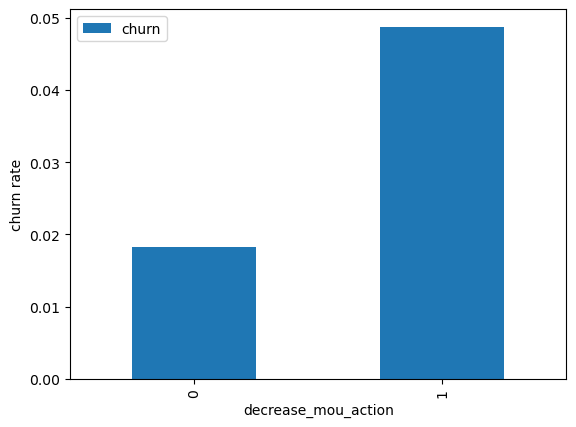

In [80]:
Telecom_df_final.pivot_table(values="churn", index="decrease_mou_action", aggfunc="mean").plot.bar()
plt.ylabel("churn rate")
plt.show()

### Insights
We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the Action phase than the Good phase. 

### Churn rate on the basis of whether the Customer decreased her/his number of recharge in Action month.

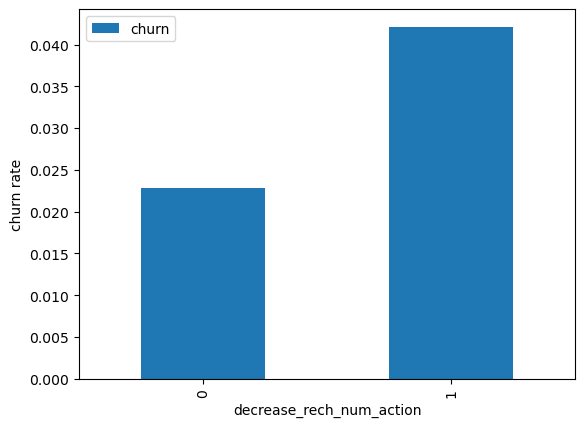

In [81]:
Telecom_df_final.pivot_table(values="churn", index="decrease_rech_num_action", aggfunc="mean").plot.bar()
plt.ylabel("churn rate")
plt.show()

### Insights
As expected, Churn rate is more for the customers, whose number of recharge in the Action phase is lesser than the number in Good phase.

### Churn rate on the basis whether the customer decreased her/his amount of recharge in Action month.

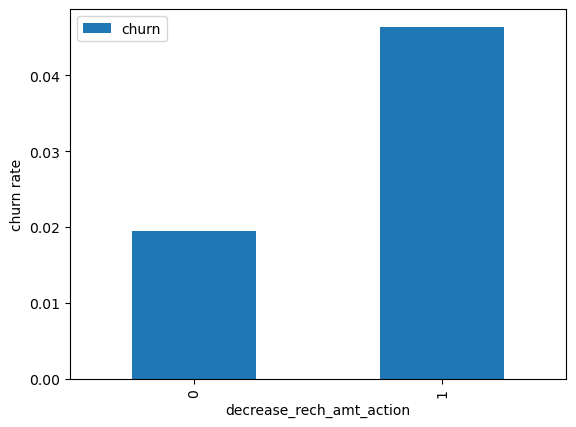

In [82]:
Telecom_df_final.pivot_table(values="churn", index="decrease_rech_amt_action", aggfunc="mean").plot.bar()
plt.ylabel("churn rate")
plt.show()

### Insights
Here also we see the same behaviour. Churn rate is more for the Customers, whose amount of recharge in the Action phase is lesser than the amount in Good phase.

### Churn rate on the basis whether the customer decreased her/his volume based cost in Action month

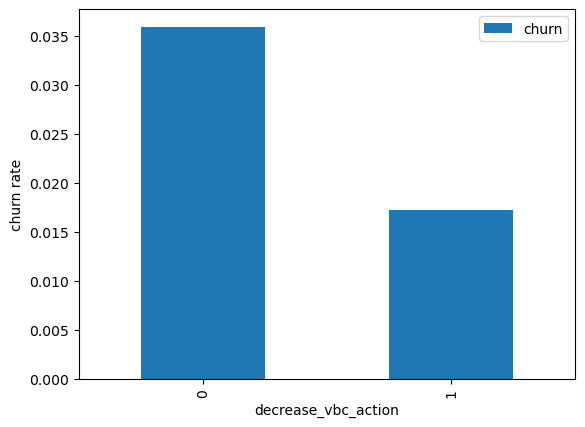

In [83]:
Telecom_df_final.pivot_table(values="churn", index="decrease_vbc_action", aggfunc="mean").plot.bar()
plt.ylabel("churn rate")
plt.show()

### Insights
Here we see the expected result. Churn rate is more for the customers, whose volume based cost in Action month is increased. That means the customers do not do the monthly recharge more when they are in the Action phase.

### Analysis of the Average revenue per customer (Churn and Not churn) in the Action phase.

In [84]:
# Creating churn dataframe.
Telecom_df_final_churn = Telecom_df_final[Telecom_df_final["churn"] == 1]

# Creating not churn dataframe.
Telecom_df_final_non_churn = Telecom_df_final[Telecom_df_final["churn"] == 0]

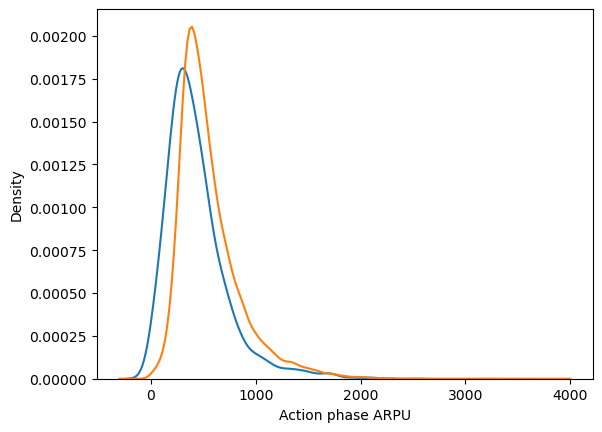

In [85]:
# PLotting Distribution plot.
ax = sns.distplot(Telecom_df_final_churn["avg_arpu_action"],label="churn",hist=False)
ax = sns.distplot(Telecom_df_final_non_churn["avg_arpu_action"],label="not churn",hist=False)
ax.set(xlabel="Action phase ARPU")
plt.show()

### Insights
Average revenue per user (ARPU) for Churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000. 

### Analysis of the minutes of usage MOU (Churn and Not churn) in the Action phase.

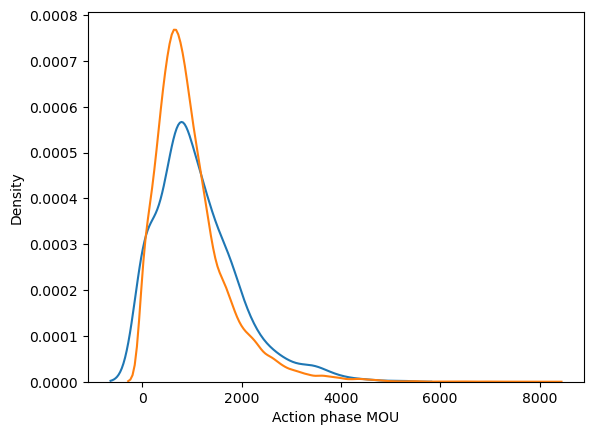

In [86]:
# Plotting Distribution plot
ax = sns.distplot(Telecom_df_final_churn["total_mou_good"],label="churn",hist=False)
ax = sns.distplot(Telecom_df_final_non_churn["total_mou_good"],label="non churn",hist=False)
ax.set(xlabel="Action phase MOU")
plt.show()

### Insights
Minutes of usage(MOU) of Churn customers is mostly populated on the range of 0 to 2500. Higher the MOU, lesser the Churn probability.

## Bivariate Analysis

### Analysis of Churn rate by the decreasing recharge amount and number of recharge in the Action Phase.

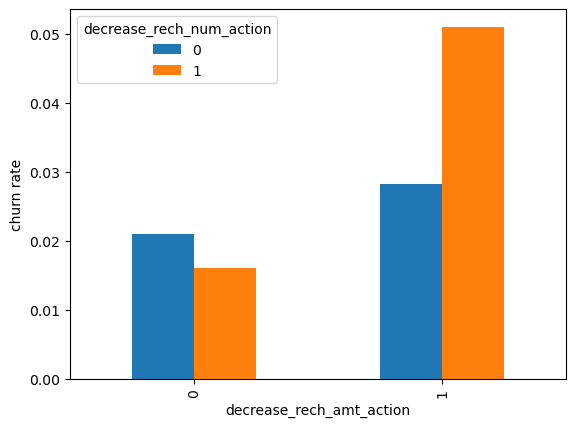

In [87]:
Telecom_df_final.pivot_table(values="churn", index="decrease_rech_amt_action", columns="decrease_rech_num_action", aggfunc="mean").plot.bar()
plt.ylabel("churn rate")
plt.show()

### Insights
We can see from the above plot, that Churn rate is more for the Customers, whose recharge amount as well as number of recharge have decreased in the Action phase than the Good phase.

### Analysis of Churn rate by the decreasing recharge amount and volume based cost in the Action phase.

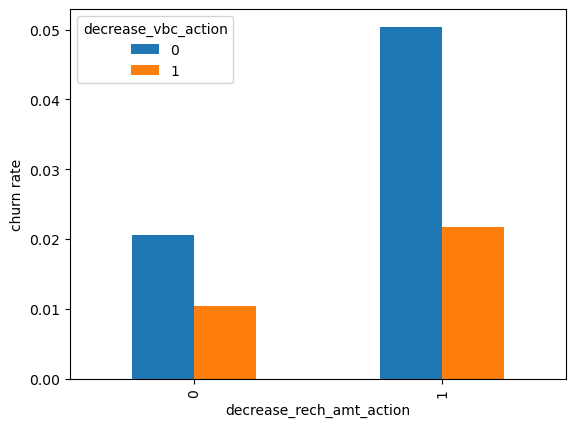

In [88]:
Telecom_df_final.pivot_table(values="churn", index="decrease_rech_amt_action", columns="decrease_vbc_action", aggfunc="mean").plot.bar()
plt.ylabel("churn rate")
plt.show()

### Insights
Here, We can see that the Churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the Action Phase.

### Analysis of recharge amount and number of recharge in Action Phase

In [90]:
plt.figure(figsize=[12,8])
ax = sns.scatterplot("avg_rech_num_action","avg_rech_amt_action", hue="churn", data=Telecom_df_final)
plt.show()

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 1200x800 with 0 Axes>

### Insights
We can see from the above pattern that the Recharge number and the Recharge amount are mostly propotional i.e. More the number of Recharge, more the Amount of the recharge.

### Dropping few derived Columns, which are not required further in our Analysis.

In [91]:
Telecom_df_final = Telecom_df_final.drop(["total_mou_good","avg_mou_action","diff_mou","avg_rech_num_action","diff_rech_num","avg_rech_amt_action",
                 "diff_rech_amt","avg_arpu_action","diff_arpu","avg_vbc_3g_action","diff_vbc","Avg_rech_amt_6_7"], axis=1)

In [92]:
# Checking head of the Dataset
Telecom_df_final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,1,1,1,1,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,1,0,1,1,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.0

In [93]:
# Checking the Shape of Dataset(Rows, Columns)
Telecom_df_final.shape

(27705, 140)

#  Train-Test Split

In [94]:
# Import the required library.
import sklearn
from sklearn.model_selection import train_test_split

In [95]:
# Putting the Feature variables into X.
X = Telecom_df_final.drop(["mobile_number","churn"], axis=1)

In [96]:
# Putting the Target variable to y
y = Telecom_df_final["churn"]

In [97]:
# Splitting the data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

# Dealing with Data Imbalance

We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques
1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method
5. SMOTETomek - Over-sampling followed by under-sampling

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [98]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [99]:
# Importing SMOTE.
from imblearn.over_sampling import SMOTE

In [100]:
# Instantiate the SMOTE.
Sm = SMOTE(random_state=27)

In [101]:
# Fitting SMOTE to the train set.
X_train, y_train = Sm.fit_resample(X_train, y_train)

#  Feature Scaling

In [100]:
# Using Standardization method.
from sklearn.preprocessing import StandardScaler

In [101]:
# Instantiate the Scaler
Scaler = StandardScaler()

In [102]:
# List of the Numeric columns
Cols_Scale = X_train.columns.to_list()

# Removing the derived Binary columns. 
Cols_Scale.remove("decrease_mou_action")
Cols_Scale.remove("decrease_rech_num_action")
Cols_Scale.remove("decrease_rech_amt_action")
Cols_Scale.remove("decrease_arpu_action")
Cols_Scale.remove("decrease_vbc_action")

In [103]:
# Fit the Data into Scaler and transform.
X_train[Cols_Scale] = Scaler.fit_transform(X_train[Cols_Scale])

In [104]:
# Checking the head of train set.
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,-0.636415,0.317224,-0.254996,-0.001208,-0.235211,-0.300833,-0.374857,-0.412810,-0.263308,-0.311548,-0.251411,0.485770,-0.190660,-0.399182,-0.256866,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,0.129144,-0.335468,-0.418749,0.254982,-0.528622,-0.338018,-0.342394,-0.504282,0.650664,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.048161,-0.731560,0.214243,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.017165,-0.346191,-0.015583,-0.013735,-0.000389,-0.860412,-0.011382,-0.203981,-0.266718,-0.242771,-0.380593,-0.272733,-0.437571,-0.290528,-0.270877,-0.150060,-0.409101,-0.363983,-0.440411,-0.175106,-0.159825,0.078711,-0.164347,0.367474,-0.117454,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.234904,0.121332,-0.064154,-0.475564,-0.287010,-0.420829,-0.366516,-0.089786,-0.192624,-0.151655,-0.153778,-0.126576,-0.099745,-0.121704,-0.081491,0.192736,-0.444988,0.305289,0.044172,-0.726027,-0.235478,0.054992,0.023937,0.029739,0.601511,-0.811577,-0.626096,-0.094017,0.696113,1.750783,0.510634,1.202971,-0.241652,3.236849,3.104207,-0.232664,4.023237,2.358097,2.447476,-0.224183,-0.221779,-0.216364,-0.141182,-0.136208,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,2.523985,2.732154,-0.254996,-0.253231,-0.304660,-0.300833,-0.374857,-0.431026,-0.201396,0.270791,0.198344,-0.529474,1.106670,0.288951,-0.276320,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.477059,0.843930,0.290569,-0.570615,-0.320253,-0.041333,-0.512504,2.294191,3.087483,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.771902,1.368343,2.063999,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.970285,1.670188,1.938953,-0.410762,0.193158,0.156537,-0.481723,0.744741,0.256589,-0.290528,-0.270877,-0.257696,-0.583307,0.570197,0.219470,-0.215496,-0.200464,-0.112725,-0.3551

In [105]:
# Checking Statistical Summary of X_train
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
count,42850.0,42850.0,42850.0,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,42850.0,42850.0,42850.0,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,42850.0,42850.0,42850.0,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,4.285000e+04,42850.000000,42850.000000,42850.000000,42850.000000,42850.000000
mean,0.0,0.0,0.0,-4.461749e-17,-2.020282e-16,-1.241352e-15,-3.946072e-16,6.054796e-16,3.576136e-16,-1.083018e-17,5.648341e-17,-5.782876e-16,-2.223829e-14,-3.310933e-14,-1.307565e-14,-1.321199e-14,5.259816e-

### Scaling the test set.
We don't fit Scaler on the test set. We only transform the test set.

In [106]:
# Transform the test set.
X_test[Cols_Scale] = Scaler.transform(X_test[Cols_Scale])

In [107]:
# Checking the head of test set
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,0.307300,2.323745,-0.077655,-0.253231,-0.304660,0.215992,-0.374857,-0.431026,-0.278217,-0.282623,-0.106758,0.028192,0.006336,0.034141,-0.087435,-0.267401,-0.244832,0.037799,-0.267368,-0.244432,-0.161248,-0.195270,-0.055078,-0.610819,-0.570510,-0.420186,0.346789,0.369671,2.702104,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.214836,-0.152215,1.550482,-0.080803,-0.092449,-0.061631,1.055196,0.774917,0.757960,0.315218,-0.015583,-0.013735,-0.254350,-0.209855,1.354152,-0.356975,-0.095026,0.281846,0.089162,-0.112790,0.515971,-0.290528,-0.270877,-0.194257,-0.156095,-0.166424,0.468259,-0.215496,-0.200464,-0.187265,0.113370,-0.185210,-0.166335,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.077912,-0.265421,-0.233610,-0.194148,-0.204469,0.286255,-0.366516,-0.089786,-0.192624,-0.151655,0.285066,-0.126576,-0.099745,-0.121704,-0.081491,-0.156412,0.260837,1.306523,0.087587,-0.236774,0.817300,0.054992,-0.173563,0.029739,0.175643,0.368450,-0.351085,3.313695,2.175444,-0.098306,-0.262491,-0.063995,0.506232,3.236849,-0.251375,-0.232664,0.457379,2.358097,2.447476,-0.224183,-0.221779,-0.216364,1.315163,1.219546,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,-0.577717,-0.256061,0.022864,-0.253231,-0.304660,-0.120122,-0.374857,-0.431026,-0.278380,-0.302589,-0.174571,-0.300150,-0.204014,-0.295881,-0.261886,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.379084,-0.337876,-0.306653,-0.619956,-0.570510,-0.415897,-0.231854,-0.437192,-0.040526,-0.143576,-0.139257,-0.104326,0.0,0.0,0.0,-0.616620,-0.714724,-0.306010,-0.080803,-0.092449,-0.061631,-0.327156,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.775847,-0.845314,-0.422452,-0.107944,-0.347607,-0.187444,0.377903,0.199498,0.240935,-0.275866,-0.257495,-0.235146,0.172870,-0.078726,0.045944,-0.215496,-0.152024,0.151031,2.985

In [108]:
# Checking Statistical Summary of X_test
X_test.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
count,5541.0,5541.0,5541.0,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.0,5541.0,5541.0,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.0,5541.0,5541.0,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000
mean,0.0,0.0,0.0,-0.055844,0.035990,0.329319,-0.189743,-0.102708,0.132059,-0.064512,-0.016158,0.219032,-0.091047,-0.133957,-0.185711,-0.122845,-0.213552,-0.250676,0.155227,0.166985,0.225216,0.322224,0.335843,0.396685,0.152183,0.153695,0.171519,-0.015855,-0.002232,0.094920,0.309922,0.324298,0.397569,-0.241188,-0.151980,0.075552,-0.187388,-0.12

# Model with PCA

In [109]:
#Importing PCA.
from sklearn.decomposition import PCA

In [110]:
# On Instantiate PCA.
Pca = PCA(random_state=42)

In [111]:
# Fit the train set on PCA.
Pca.fit(X_train)

PCA(random_state=42)

In [112]:
# Checking Principal components.
Pca.components_

array([[-7.50315936e-20, -4.16333634e-17, -1.11022302e-16, ...,
        -2.59799614e-02, -2.57740516e-02,  1.40032998e-02],
       [-1.61507486e-19, -5.55111512e-17,  2.22044605e-16, ...,
        -1.16737642e-02, -9.94022864e-03, -1.42598315e-02],
       [ 1.91332162e-19,  5.55111512e-17, -2.77555756e-17, ...,
        -4.18532955e-02, -4.28357226e-02,  2.46812846e-02],
       ...,
       [ 0.00000000e+00, -1.44980720e-01,  8.57134629e-02, ...,
         3.15064343e-16, -1.35638700e-16, -1.16214614e-16],
       [ 9.99999772e-01,  5.11621004e-04,  2.69983549e-04, ...,
         3.33837926e-19,  3.59063946e-19, -1.94324181e-17],
       [ 0.00000000e+00,  2.43352997e-02,  8.70715525e-02, ...,
         3.04356571e-17, -2.71490851e-17, -3.59955121e-17]])

In [113]:
# Cumulative Variance of the PCs.
Variance_cumu = np.cumsum(Pca.explained_variance_ratio_)
print(Variance_cumu)

[0.11213256 0.19426234 0.24575583 0.28953571 0.32841891 0.36623473
 0.40173361 0.43144425 0.45702167 0.48194328 0.50480575 0.52673812
 0.54724457 0.5670202  0.58530008 0.60304258 0.6190213  0.63473458
 0.64927873 0.66341423 0.67712828 0.69025011 0.7020618  0.71278516
 0.72309435 0.73290234 0.74255604 0.75209676 0.76151565 0.77010093
 0.77861315 0.7866115  0.79429496 0.80173555 0.80878909 0.81538157
 0.82193734 0.8283476  0.83472622 0.84089758 0.84687761 0.85280024
 0.85840083 0.86374029 0.86901646 0.87418749 0.87891437 0.88341796
 0.887723   0.89186057 0.89588256 0.89966074 0.90339384 0.90704071
 0.91060084 0.91411689 0.91752343 0.92076319 0.92395413 0.92705111
 0.93001239 0.93296077 0.93580029 0.93862291 0.94138851 0.9441162
 0.94678675 0.94937767 0.95188405 0.95433786 0.95665036 0.95893735
 0.96116409 0.96323063 0.96526039 0.967203   0.96912626 0.97100138
 0.97284931 0.9746657  0.97639261 0.97806622 0.97972617 0.98133794
 0.98290963 0.98446566 0.98601222 0.98753485 0.98877905 0.98998

### Plotting Scree Plot

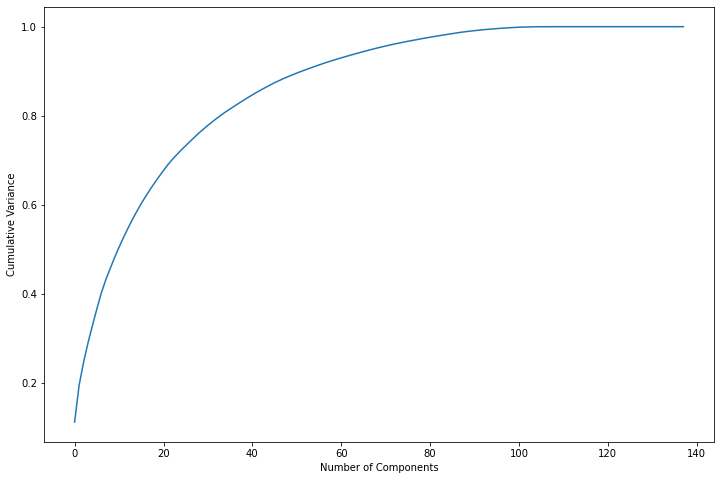

In [114]:
# Plotting Scree plot.
fig = plt.figure(figsize = [12,8])
plt.plot(Variance_cumu)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()

### Insights
From above Scree Plot, We can see that "60 components" explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

### Performing PCA with 60 components

In [115]:
# On Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [116]:
# Instantiate PCA with 60 components
Pca_final = IncrementalPCA(n_components=60)

In [117]:
# By Fit and transform the X_train.
X_train_Pca = Pca_final.fit_transform(X_train)

In [118]:
# Checking the shape
X_train_Pca.shape

(42850, 60)

### Applying transformation on the test set
We are only doing transform in the test set not the Fit_Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [119]:
# transform the X_test.
X_test_Pca = Pca_final.transform(X_test)

In [120]:
# Checking the shape
X_test_Pca.shape

(5541, 60)

### Emphasize "Sensitivity" / "Recall" than "Accuracy".

We are more focused on higher "Sensitivity"/"Recall" score than the "Accuracy".

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, If we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the Sensitivity score is more important here.

## Logistic Regression with PCA

In [121]:
# Importing Scikit logistic regression module.
from sklearn.linear_model import LogisticRegression

In [122]:
# Importing Required Metrics.
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Tuning Hyperparameter  "C"
"C" is the the inverse of Regularization strength in Logistic Regression. Higher values of "C" correspond to less Regularization.

In [123]:
# Importing Required libraries for Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [124]:
# Creating the KFold Object with 5 splits.
Folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify Params
Params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as "recall" as we are more focused on acheiving the higher "sensitivity" than "accuracy".
Model_Cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = Params, 
                        scoring= 'recall', 
                        cv = Folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the Model
Model_Cv.fit(X_train_Pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [125]:
# Results of the "GridSearchCV"
CV_results = pd.DataFrame(Model_Cv.cv_results_)
CV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.305305,0.021556,0.005389,0.005907,0.01,{'C': 0.01},0.900071,0.897759,0.895814,0.906425,0.887552,0.897524,0.006134,5,0.901116,0.898256,0.899387,0.895440,0.897971,0.898434,0.001861
1,0.509029,0.011832,0.006249,0.007654,0.1,{'C': 0.1},0.898177,0.896359,0.894651,0.905959,0.889403,0.896910,0.005390,6,0.901174,0.898431,0.899270,0.896725,0.899257,0.898971,0.001440
2,0.521364,0.020246,0.009940,0.008182,1,{'C': 1},0.898650,0.898693,0.895581,0.905028,0.890329,0.897656,0.004783,4,0.901988,0.898606,0.898861,0.898184,0.899199,0.899368,0.001351
3,0.514455,0.005315,0.003125,0.006251,10,{'C': 10},0.898887,0.898459,0.896744,0.904562,0.889866,0.897704,0.004719,3,0.902511,0.898956,0.898394,0.898476,0.899550,0.899577,0.001524
4,0.517555,0.013766,0.009373,0.007653,100,{'C': 100},0.899597,0.898226,0.896977,0.904330,0.890329,0.897892,0.004528,1,0.902628,0.898722,0.898569,0.898593,0.899608,0.899624,0.001550
5,0.592051,0.049267,0.006251,0.007656,1000,{'C': 1000},0.899597,0.898226,0.896977,0.904330,0.890329,0.897892,0.004528,1,0.902628,0.898839,0.898686,0.898593,0.899608,0.899671,0.001521


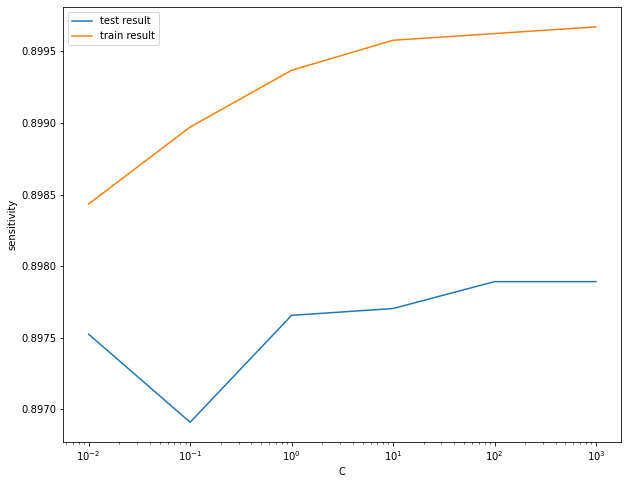

In [126]:
# Plot of C versus train and Validation Scores.

plt.figure(figsize=[10, 8])
plt.plot(CV_results["param_C"], CV_results["mean_test_score"])
plt.plot(CV_results["param_C"], CV_results["mean_train_score"])
plt.xlabel("C")
plt.ylabel("sensitivity")
plt.legend(["test result", "train result"], loc="upper left")
plt.xscale("log")
plt.show()

In [127]:
# The Best score with Best C.
Best_score = Model_Cv.best_score_
Best_C = Model_Cv.best_params_["C"]

print(" The highest test sensitivity is {0} at C = {1}".format(Best_score, Best_C))

 The highest test sensitivity is 0.8978916608693863 at C = 100


### Logistic Regression with Optimal C

In [128]:
# Instantiate the Model with Best C
Logistic_Pca = LogisticRegression(C=Best_C)

In [129]:
# Fit the Model on train Dataset.
Log_Pca_Model = Logistic_Pca.fit(X_train_Pca, y_train)

### Prediction on the train Dataset

In [130]:
# Predictions on the train Dataset.
y_train_pred = Log_Pca_Model.predict(X_train_Pca)

In [131]:
# Confusion Matrix.
Confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(Confusion)

[[17908  3517]
 [ 2154 19271]]


In [132]:
TP = Confusion[1,1] # True Positive 
TN = Confusion[0,0] # True Negatives
FP = Confusion[0,1] # False Positives
FN = Confusion[1,0] # False Negatives

In [133]:
# Checking the Accuracy on the train Dataset.
print(metrics.accuracy_score(y_train,y_train_pred))

0.8676546091015169


In [134]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.899463243873979

In [135]:
# Calcualting Specificity
TN/ float(TN+FP)

0.8358459743290548

In [136]:
# Calculate False Postive rate
FP/ float(FP+TN)

0.16415402567094517

In [137]:
# Precesion (positive Predictive value)
TP/ float(TP+FP)

0.8456643847639108

In [138]:
# Negative Predictive value
TN/ float(TN+FN)

0.8926328382015751

### Prediction on the test Dataset

In [139]:
# Prediction on the test Dataset.
y_test_pred = Log_Pca_Model.predict(X_test_Pca)

In [140]:
# Confusion Matrix.
Confusion1 = metrics.confusion_matrix(y_test, y_test_pred)
print(Confusion1)

[[4452  896]
 [  36  157]]


In [141]:
TP = Confusion1[1,1] # True Positive 
TN = Confusion1[0,0] # True Negatives
FP = Confusion1[0,1] # False Positives
FN = Confusion1[1,0] # False Negatives

In [142]:
# Checking the Accuracy on the test Dataset.
print(metrics.accuracy_score(y_test,y_test_pred))

0.8317993142032124


In [143]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.8134715025906736

In [144]:
# Calcualting Specificity
TN/ float(TN+FP)

0.8324607329842932

### Model summary

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83
    
Overall, the model is performing well in the test set, what it had learnt from the train Dataset.

## Support Vector Machine(SVM) with PCA

In [145]:
# Importing the SVC
from sklearn.svm import SVC

### Hyperparameter Tuning

"C":- Regularization Parameter.

"gamma":- Handles Non-Linear Classifications.

In [146]:
# Specify Range of Hyperparameters.

Hyper_Params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# Specify the Model with RBF kernel.
Model = SVC(kernel="rbf")

# Set up GridSearchCV()
Model_Cv = GridSearchCV(estimator = Model, 
                        param_grid = Hyper_Params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# Fit the Model
Model_Cv.fit(X_train_Pca, y_train)                  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [147]:
# Checking CV Results
CV_Results = pd.DataFrame(Model_Cv.cv_results_)
CV_Results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.115642,0.157035,11.750174,0.125600,1,0.01,"{'C': 1, 'gamma': 0.01}",0.944903,0.941679,0.940699,0.942427,0.001796,5,0.947210,0.947247,0.947702,0.947386,0.000224
1,27.881659,0.461227,16.304826,0.250862,1,0.001,"{'C': 1, 'gamma': 0.001}",0.883366,0.884268,0.884058,0.883897,0.000385,10,0.883813,0.886757,0.885707,0.885426,0.001218
2,36.747906,0.257600,20.724934,0.180327,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.858513,0.858433,0.859133,0.858693,0.000313,12,0.858993,0.859908,0.859173,0.859358,0.000396
3,20.900638,0.316616,7.635889,0.089896,10,0.01,"{'C': 10, 'gamma': 0.01}",0.967026,0.965413,0.965063,0.965834,0.000855,3,0.975040,0.973536,0.974306,0.974294,0.000614
4,23.765153,0.387813,12.957813,0.099838,10,0.001,"{'C': 10, 'gamma': 0.001}",0.910459,0.911433,0.908073,0.909988,0.001412,7,0.913709,0.911891,0.912381,0.912660,0.000768
5,29.116506,0.274493,16.477919,0.090825,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.870414,0.869355,0.872786,0.870852,0.001434,11,0.871421,0.873875,0.870690,0.871995,0.001362
6,30.766144,4.675826,5.079372,0.082149,100,0.01,"{'C': 100, 'gamma': 0.01}",0.973397,0.976686,0.975775,0.975286,0.001387,2,0.991318,0.990444,0.990198,0.990653,0.000481
7,29.274541,0.211407,10.154705,0.164605,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935662,0.935518,0.934608,0.935263,0.000467,6,0.941819,0.942066,0.941681,0.941855,0.000159
8,26.678017,0.904592,14.839873,0.154489,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.884906,0.886438,0.886718,0.886021,0.000797,9,0.886368,0.888893,0.888543,0.887935,0.001117
9,48.589096,1.757820,3.802789,0.041477,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.972277,0.977876,0.976336,0.975496,0.002362,1,0.998425,0.998495,0.998495,0.998471,0.000033


### Plotting the Accuracy with various "C" and "gamma" values.

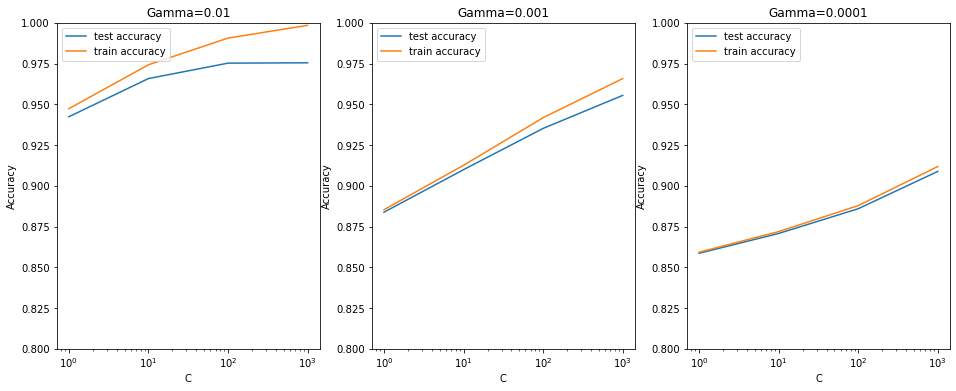

In [148]:
# Converting the "C" to Numeric type for Plotting on X-axis
CV_Results["param_C"] = CV_Results["param_C"].astype("int")

# # plotting
plt.figure(figsize=(16,6))

# Plotting Subplot 1/3
plt.subplot(131)
gamma_01 = CV_Results[CV_Results["param_gamma"]==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(["test accuracy", "train accuracy"], loc="upper left")
plt.xscale("log")

# Plotting Subplot 2/3
plt.subplot(132)
gamma_001 = CV_Results[CV_Results["param_gamma"]==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(["test accuracy", "train accuracy"], loc="upper left")
plt.xscale("log")


# Plotting Subplot 3/3
plt.subplot(133)
gamma_0001 = CV_Results[CV_Results["param_gamma"]==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(["test accuracy", "train accuracy"], loc="upper left")
plt.xscale("log")
plt.show()

In [149]:
# Printing the Best Score 
Best_score = Model_Cv.best_score_
Best_hyperparams = Model_Cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(Best_score, Best_hyperparams))

The best test score is 0.9754959911159373 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


### Insights
From the above plot, we can see that higher value of "gamma" leads to overfitting the model. With the lowest value of "gamma" (0.0001), we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Build the Model with Optimal Hyperparameters.

In [150]:
# Building the Model with Optimal Hyperparameters.
Svm_Pca_Model = SVC(C=100, gamma=0.0001, kernel="rbf")

Svm_Pca_Model.fit(X_train_Pca, y_train)

SVC(C=100, gamma=0.0001)

### Prediction on the train Dataset

In [151]:
# Predictions on the train Dataset
y_train_pred = Svm_Pca_Model.predict(X_train_Pca)

In [152]:
# Creating Confusion Matrix.
Confusion2 = metrics.confusion_matrix(y_train, y_train_pred)
print(Confusion2)

[[18376  3049]
 [ 1585 19840]]


In [153]:
TP = Confusion2[1,1] # True Positive 
TN = Confusion2[0,0] # True Negatives
FP = Confusion2[0,1] # False Positives
FN = Confusion2[1,0] # False Negatives

In [154]:
# Checking the Accuracy on the train Dataset.
print(metrics.accuracy_score(y_train,y_train_pred))

0.891855309218203


In [155]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.9260210035005835

In [156]:
# Calcualting Specificity
TN/ float(TN+FP)

0.8576896149358226

### Prediction on the test Dataset

In [157]:
# Prediction on the test Dataset
y_test_pred = Svm_Pca_Model.predict(X_test_Pca)

In [158]:
# Creating Confusion matrix
Confusion3 = metrics.confusion_matrix(y_test, y_test_pred)
print(Confusion3)

[[4557  791]
 [  36  157]]


In [159]:
TP = Confusion3[1,1] # True Positive 
TN = Confusion3[0,0] # True Negatives
FP = Confusion3[0,1] # False Positives
FN = Confusion3[1,0] # False Negatives

In [160]:
# Checking the Accuracy on the test Dataset.
print(metrics.accuracy_score(y_test,y_test_pred))

0.8507489622811767


In [161]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.8134715025906736

In [162]:
# Calcualting Specificity
TN/ float(TN+FP)

0.8520942408376964

### Model summary

- Train set
    - Accuracy = 0.89
    - Sensitivity = 0.92
    - Specificity = 0.85
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.81
    - Specificity = 0.85

# Decision Tree with PCA

In [163]:
# Importing decision tree Classifier
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter Tuning

In [164]:
# Creating Parameter Grid 
Param_Grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# On Instantiate the Grid Search Model
DTree = DecisionTreeClassifier()

Grid_Search = GridSearchCV(estimator = DTree, 
                           param_grid = Param_Grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
Grid_Search.fit(X_train_Pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [165]:
# Creating CV Results.
CV_Results = pd.DataFrame(Grid_Search.cv_results_)
CV_Results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.028397,0.026559,0.004612,0.005508,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
1,1.006855,0.006799,0.000000,0.000000,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
2,0.987711,0.000549,0.000000,0.000000,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849008,0.861470,0.009686,7
3,1.019170,0.029901,0.006259,0.007665,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849008,0.861470,0.009686,7
4,1.757751,0.106983,0.000801,0.001602,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
5,1.728926,0.048841,0.000000,0.000000,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
6,1.621081,0.018980,0.003128,0.006256,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.871179,0.875613,0.891949,0.883781,0.882427,0.007964,4
7,1.640195,0.027713,0.000000,0.000000,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.871179,0.875613,0.891949,0.884247,0.882520,0.007982,3


In [166]:
# Print the Optimal Sensitivity Score and Hyperparameters.
print("Best sensitivity:-", Grid_Search.best_score_)
print(Grid_Search.best_estimator_)

Best sensitivity:- 0.9004900816802801
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


### Model with Optimal Hyperparameters.

In [167]:
# Model with Optimal Hyperparameters.
Dt_Pca_Model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

Dt_Pca_Model.fit(X_train_Pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Prediction on the train Dataset

In [168]:
# Predictions on the train Dataset
y_train_pred = Dt_Pca_Model.predict(X_train_Pca)

In [169]:
# Creating Confusion matrix.
Confusion4 = metrics.confusion_matrix(y_train, y_train_pred)
print(Confusion4)

[[18913  2512]
 [ 1763 19662]]


In [170]:
TP = Confusion4[1,1] # True Positive 
TN = Confusion4[0,0] # True Negatives
FP = Confusion4[0,1] # False Positives
FN = Confusion4[1,0] # False Negatives

In [171]:
# Checking the Accuracy on the train Dataset.
print(metrics.accuracy_score(y_train,y_train_pred))

0.9002333722287048


In [172]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.9177129521586931

In [173]:
# Calcualting Specificity
TN/ float(TN+FP)

0.8827537922987164

### Prediction on the test Dataset

In [174]:
# Prediction on the test Dataset
y_test_pred = Dt_Pca_Model.predict(X_test_Pca)

In [175]:
# Creating Confusion Matrix.
Confusion5 = metrics.confusion_matrix(y_test, y_test_pred)
print(Confusion5)

[[4632  716]
 [  58  135]]


In [176]:
TP = Confusion5[1,1] # True Positive 
TN = Confusion5[0,0] # True Negatives
FP = Confusion5[0,1] # False Positives
FN = Confusion5[1,0] # False Negatives

In [177]:
# Checking the Accuracy on the test Dataset.
print(metrics.accuracy_score(y_test,y_test_pred))

0.8603140227395777


In [178]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.6994818652849741

In [179]:
# Calcualting Specificity
TN/ float(TN+FP)

0.8661181750186986

### Model summary

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

# Random Forest with PCA

In [180]:
# Importing the Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter Tuning

In [181]:
# Creating Parameter Grid.
Param_Grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# Create a base Model
Rf = RandomForestClassifier()

# Instantiate the Grid Search Model.
Grid_Search = GridSearchCV(estimator = Rf, 
                           param_grid = Param_Grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fitting the Model
Grid_Search.fit(X_train_Pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [182]:
# Printing the Optimal Accuracy Score and Hyperparameters.
print('We can get accuracy of',Grid_Search.best_score_,'using',Grid_Search.best_params_)

We can get accuracy of 0.8446674286111188 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


### Model with Optimal Hyperparameters.

In [183]:
# Model with the Best Hyperparameters.

Rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [184]:
# Fitting the Model.
Rfc_model.fit(X_train_Pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

### Prediction on the train Dataset

In [185]:
# Predictions on the train Dataset
y_train_pred = Rfc_model.predict(X_train_Pca)

In [186]:
# Creating Confusion Matrix.
Confusion6 = metrics.confusion_matrix(y_train, y_train_pred)
print(Confusion6)

[[17348  4077]
 [ 2422 19003]]


In [187]:
TP = Confusion6[1,1] # True Positive 
TN = Confusion6[0,0] # True Negatives
FP = Confusion6[0,1] # False Positives
FN = Confusion6[1,0] # False Negatives

In [188]:
# Checking the Accuracy on the train Dataset.
print(metrics.accuracy_score(y_train,y_train_pred))

0.8483313885647608


In [189]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.8869544924154026

In [190]:
# Calcualting Specificity
TN/ float(TN+FP)

0.809708284714119

### Prediction on the test Dataset

In [191]:
# Prediction on the test Dataset.
y_test_pred = Rfc_model.predict(X_test_Pca)

In [192]:
# Creating Confusion Matrix.
Confusion7 = metrics.confusion_matrix(y_test, y_test_pred)
print(Confusion7)

[[4282 1066]
 [  47  146]]


In [193]:
TP = Confusion7[1,1] # True Positive 
TN = Confusion7[0,0] # True Negatives
FP = Confusion7[0,1] # False Positives
FN = Confusion7[1,0] # False Negatives

In [194]:
# Checking the Accuracy on the test Dataset.
print(metrics.accuracy_score(y_test,y_test_pred))

0.7991337303735788


In [195]:
# Calcualting Sensitivity (Recall)
TP/ float(TP+FN)

0.7564766839378239

In [196]:
# Calcualting Specificity
TN/ float(TN+FP)

0.8006731488406881

### Model summary

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.88
    - Specificity = 0.80
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.75
    - Specificity = 0.80
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Final conclusion Model with PCA

After trying several models we can see that for acheiving the best "Sensitivity", which was our ultimate goal, the classic "Logistic regression" or the "SVM" models preforms well. For both the models the sensitivity was approx 81%. Also, We have good accuracy of approx 85%.

# Model Without PCA

# Logistic Regression without PCA

In [197]:
# Importing Stats Model
import statsmodels.api as sm

In [198]:
# Instantiate the Model
# Adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
log_without_pca = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

In [199]:
# Fit the Model
log_without_pca = log_without_pca.fit().summary()

In [200]:
# Summary
print(log_without_pca)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Apr 2023   Deviance:                       23572.
Time:                        19:53:38   Pearson chi2:                 3.71e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model analysis
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## Feature Selection Using RFE (Recursive Feature Elimination)

In [201]:
# Importing the logistic Regression from Sklearn.
from sklearn.linear_model import LogisticRegression

# Intantiate logistic regression
Logreg = LogisticRegression()

### RFE with 15 Columns

In [202]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 Columns.
Rfe = RFE(Logreg,n_features_to_select= 15)

# Fit the Rfe model with train set.
Rfe = Rfe.fit(X_train, y_train)

In [203]:
Rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,

In [204]:
list(zip(X_train.columns, Rfe.support_, Rfe.ranking_))

[('loc_og_t2o_mou', False, 124),
 ('std_og_t2o_mou', False, 123),
 ('loc_ic_t2o_mou', False, 122),
 ('arpu_6', False, 85),
 ('arpu_7', False, 51),
 ('arpu_8', False, 10),
 ('onnet_mou_6', False, 78),
 ('onnet_mou_7', False, 21),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_6', False, 63),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 58),
 ('roam_ic_mou_7', False, 76),
 ('roam_ic_mou_8', False, 24),
 ('roam_og_mou_6', False, 59),
 ('roam_og_mou_7', False, 49),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 73),
 ('loc_og_t2t_mou_7', False, 18),
 ('loc_og_t2t_mou_8', False, 28),
 ('loc_og_t2m_mou_6', False, 36),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', False, 15),
 ('loc_og_t2f_mou_6', False, 57),
 ('loc_og_t2f_mou_7', False, 113),
 ('loc_og_t2f_mou_8', False, 56),
 ('loc_og_t2c_mou_6', False, 79),
 ('loc_og_t2c_mou_7', False, 104),
 ('loc_og_t2c_mou_8', False, 70),
 ('loc_og_mou_6', False, 72),
 ('loc_og_mou_7', False, 103),
 (

In [205]:
# Columns Selected by RFE
Rfe_cols = X_train.columns[Rfe.support_]
print(Rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


## Model-1 with RFE Selected Columns

In [206]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[Rfe_cols])

#Instantiate the Model.
log_without_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_without_pca_1 = log_without_pca_1.fit()

print(log_without_pca_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Apr 2023   Deviance:                       30008.
Time:                        19:55:11   Pearson chi2:                 4.49e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -53.0128   4

### Checking VIFs

In [207]:
# Checking the VIF values of the Feature Variables. 
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
# Create a Dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif["Features"] = X_train[Rfe_cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[Rfe_cols].values, i) for i in range(X_train[Rfe_cols].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
8,loc_ic_mou_8,1.68
7,loc_ic_t2f_mou_8,1.21
11,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
14,decrease_vbc_action,1.08
13,monthly_3g_8,1.06
6,og_others_8,1.05


### Removing column og_others_8, which is insignificant as it has the highest p-value 0.99

In [209]:
# Removing the "og_others_8" Column 
Log_cols = Rfe_cols.to_list()
Log_cols.remove("og_others_8")
print(Log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


## Model-2
Building the Model after removing "og_others_8" Variable.

In [210]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[Log_cols])

#Instantiate the Model
log_without_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the Model
log_without_pca_2 = log_without_pca_2.fit()

print(log_without_pca_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15034.
Date:                Tue, 18 Apr 2023   Deviance:                       30068.
Time:                        19:55:12   Pearson chi2:                 4.51e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4957
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1052    

### Checking VIF for Model-2

In [211]:
# Create a Dataframe that will contain the names of all the Feature variables and their respective VIFs.
vif = pd.DataFrame()
vif["Features"] = X_train[Log_cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[Log_cols].values, i) for i in range(X_train[Log_cols].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
7,loc_ic_mou_8,1.68
6,loc_ic_t2f_mou_8,1.21
10,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
13,decrease_vbc_action,1.08
12,monthly_3g_8,1.06
11,monthly_2g_8,1.05


As we can see from the Model Summary that all the Variables p-values are significant and "offnet_mou_8" column has the highest VIF 7.45. Hence, deleting "offnet_mou_8" column.

In [212]:
# Removing the "offnet_mou_8" Column.
Log_cols.remove("offnet_mou_8")

## Model-3
Model after removing "offnet_mou_8" Column.

In [213]:
# Adding constant to X_train.
X_train_sm_3 = sm.add_constant(X_train[Log_cols])

#Instantiate the Model
log_without_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the Model.
log_without_pca_3 = log_without_pca_3.fit()

print(log_without_pca_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15720.
Date:                Tue, 18 Apr 2023   Deviance:                       31440.
Time:                        19:55:13   Pearson chi2:                 3.92e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4793
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2058    

### VIF Model-3

In [214]:
vif = pd.DataFrame()
vif["Features"] = X_train[Log_cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[Log_cols].values, i) for i in range(X_train[Log_cols].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2m_mou_8,1.87
0,offnet_mou_7,1.72
6,loc_ic_mou_8,1.33
5,loc_ic_t2f_mou_8,1.21
9,total_rech_num_8,1.17
12,decrease_vbc_action,1.07
1,roam_og_mou_8,1.06
11,monthly_3g_8,1.06
10,monthly_2g_8,1.05
7,std_ic_t2f_mou_8,1.02


### Insights
Now, from the Model summary and the VIF list we can see that all the Variables are significant and there is no Multicollinearity among the Variables.

Hence, we can conclude that ***Model-3  "log_without_pca_3"  will be the final model***.

##  Model Performance on the train Dataset

In [215]:
# Getting the Predicted value on the train Dataset.
y_train_pred_without_pca = log_without_pca_3.predict(X_train_sm_3)
y_train_pred_without_pca.head()

0    2.687411e-01
1    7.047483e-02
2    8.024370e-02
3    3.439222e-03
4    5.253815e-19
dtype: float64

### Creating a Dataframe with the Actual churn and the Predicted Probabilities

In [216]:
y_train_pred_final = pd.DataFrame({"churn":y_train.values, "churn_prob":y_train_pred_without_pca.values})

#Assigning Customer ID for each record for better Readblity.
# "CustID" is the index of each record.
y_train_pred_final["CustID"] = y_train_pred_final.index
y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.687411e-01,0
1,0,7.047483e-02,1
2,0,8.024370e-02,2
3,0,3.439222e-03,3
4,0,5.253815e-19,4


### Finding the Optimal Probablity Cutoff Point.

In [217]:
# Creating Columns for the different Probablity Cutoffs.
Prob_cutoff = [float(P/10) for P in range(10)]

for i in Prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final["churn_prob"].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0


### Now let's Calculate the Accuracy, Sensitivity and Specificity for the various probability Cutoffs.

In [218]:
# Creating a dataframe
Cutoff_df = pd.DataFrame(columns=["probability", "accuracy", "sensitivity", "specificity"])

for i in Prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final["churn"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(Cutoff_df)    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.753629     0.984411     0.522847
0.2          0.2  0.788751     0.964714     0.612789
0.3          0.3  0.812509     0.946371     0.678646
0.4          0.4  0.829638     0.923874     0.735403
0.5          0.5  0.844131     0.895823     0.792439
0.6          0.6  0.844271     0.839860     0.848681
0.7          0.7  0.836173     0.769522     0.902824
0.8          0.8  0.800163     0.652275     0.948051
0.9          0.9  0.595426     0.207001     0.983851


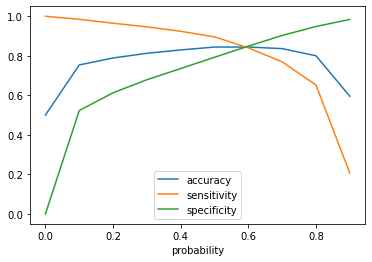

In [219]:
# Plotting accuracy, sensitivity and specificity for the different Probabilities.
Cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

### Insights
#### Analysis of the above Curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

"At point 0.6" where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking ***0.5*** for acheiving higher sensitivity, which is our main goal.

In [220]:
# Creating a column with name "predicted", which is the Predicted Value for 0.5 cutoff. 
y_train_pred_final["predicted"] = y_train_pred_final["churn_prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0,0


### Metrics

In [221]:
# Creating Confusion Matrix.
Confusion = metrics.confusion_matrix(y_train_pred_final["churn"], y_train_pred_final["predicted"])
print(Confusion)

[[16978  4447]
 [ 2232 19193]]


In [222]:
TP = Confusion[1,1] # True Positive 
TN = Confusion[0,0] # True Negatives
FP = Confusion[0,1] # False Positives
FN = Confusion[1,0] # False Negatives

In [223]:
# Let's check the Accuracy on the train dataset.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.8441306884480747

In [224]:
# Let's see the Sensitivity(Recall).
TP / float(TP+FN)

0.8958226371061844

In [225]:
# Let us calculate Specificity
TN / float(TN+FP)

0.792438739789965

In [226]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20756126021003501


In [227]:
# positive predictive value 
print (TP / float(TP+FP))

0.8118866328257192


In [228]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8838105153565851


We have got good accuracy, sensitivity and specificity on the train set prediction.

## Plotting the ROC Curve (Trade off between sensitivity & specificity)
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [229]:
# ROC Curve function

def Draw_Roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

    return None

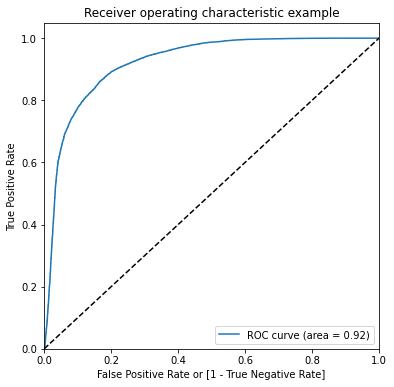

In [230]:
Draw_Roc(y_train_pred_final["churn"], y_train_pred_final["churn_prob"])

### Insights
We can see the Area of the ROC curve is closer to 1, which is the Gini of the Model.

## Testing the Model on the test Dataset

In [231]:
# Taking a copy of the test Dataset
X_test_Log = X_test.copy()

In [232]:
# Taking only the Columns, which are Selected in the train Dataset after removing insignificant and Multicollinear variables.
X_test_Log = X_test_Log[Log_cols]

In [233]:
# Adding Constant on the test Dataset
X_test_sm = sm.add_constant(X_test_Log)

### Predictions on the test set with Final Model

In [234]:
# Predict on the test Dataset
y_test_pred = log_without_pca_3.predict(X_test_sm)

In [235]:
# Checking the head
y_test_pred.head()

5704     0.034015
64892    0.000578
39613    0.513564
93118    0.020480
81235    0.034115
dtype: float64

In [236]:
# Converting "y_test_pred" to a dataframe because "y_test_pred" is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Checking the head
y_pred_1.head()

,0
5704,0.034015
64892,0.000578
39613,0.513564
93118,0.020480
81235,0.034115


In [237]:
# Converting the y_test to a Dataframe.
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [238]:
# Putting index to Customer ID ("CustID") 
y_test_df["CustID"] = y_test_df.index

In [239]:
# Removing index from the both Dataframes for merging them side by side.
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [240]:
# Appending the "y_pred_1" and "y_test_df".
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [241]:
# Checking the head
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.034015
1,0,64892,0.000578
2,0,39613,0.513564
3,0,93118,0.020480
4,0,81235,0.034115


In [242]:
# Renaming the '0' Column as the Churn Probablity.
y_test_pred_final = y_test_pred_final.rename(columns={0:"churn_prob"})

In [243]:
# Rearranging the Columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)
# Checking the head
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.034015
1,64892,0,0.000578
2,39613,0,0.513564
3,93118,0,0.020480
4,81235,0,0.034115


In [244]:
# In the test Dataset using Probablity cutoff 0.5, what we got in the train Dataset. 
y_test_pred_final["test_predicted"] = y_test_pred_final["churn_prob"].map(lambda x: 1 if x > 0.5 else 0)

In [245]:
# Checking ṭhe head
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.034015,0
1,64892,0,0.000578,0
2,39613,0,0.513564,1
3,93118,0,0.020480,0
4,81235,0,0.034115,0


### Metrics

In [246]:
# Creating Confusion Matrix.
Confusion = metrics.confusion_matrix(y_test_pred_final["churn"], y_test_pred_final["test_predicted"])
print(Confusion)

[[4190 1158]
 [  34  159]]


In [247]:
TP = Confusion[1,1] # True Positive 
TN = Confusion[0,0] # True Negatives
FP = Confusion[0,1] # False Positives
FN = Confusion[1,0] # False Negatives

In [248]:
# Let's check the Accuracy on the test dataset.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.test_predicted)

0.7848763761053962

In [249]:
# Let's see the Sensitivity(Recall).
TP / float(TP+FN)

0.8238341968911918

In [250]:
# Let us calculate Specificity
TN / float(TN+FP)

0.7834704562453254

### Model summary

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Final conclusion Model without PCA

We can see that the Logistic Regression Model without PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. 
The Model also helps us to identify the variables which should helps in Business Decision Making regarding churned customers. Hence, the model is more relevant in terms of explaining to the business.

#  Business Recomendations

## Top predictors

Below are few top variables selected in the Logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

## Recomendations

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.


### Plots of Important Predictors for churn and non churn Customers.

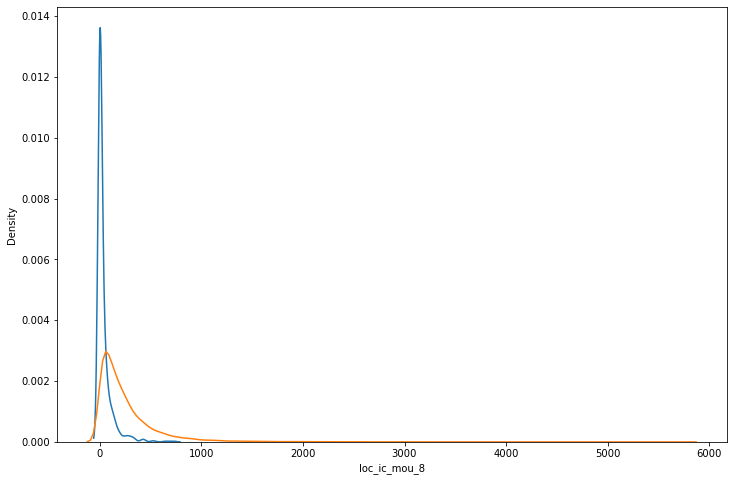

In [251]:
# Plotting the "loc_ic_mou_8" Predictor for churn and not churn Customers
fig = plt.figure(figsize=[12,8])
sns.distplot(Telecom_df_final_churn["loc_ic_mou_8"],label="churn",hist=False)
sns.distplot(Telecom_df_final_non_churn["loc_ic_mou_8"],label="not churn",hist=False)
plt.show()

### Insights
We can see that for the Churn customers the minutes of usage for the month of August is mostly populated on the lower side than the Non churn customers.

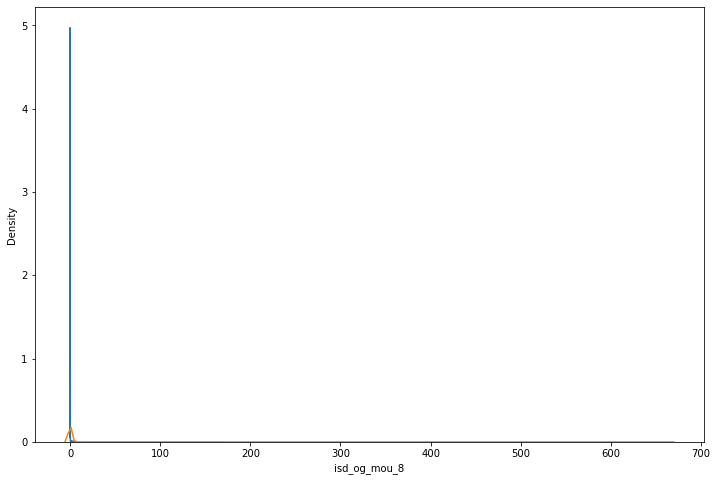

In [252]:
# Plotting the "isd_og_mou_8" Predictor for Churn and Non churn customers
fig = plt.figure(figsize=[12,8])
sns.distplot(Telecom_df_final_churn["isd_og_mou_8"],label="churn",hist=False)
sns.distplot(Telecom_df_final_non_churn["isd_og_mou_8"],label="not churn",hist=False)
plt.show()

### Insights
We can see that the ISD outgoing minutes of usage for the month of August for Churn customers is densed approximately to zero. On the other hand for the Non churn customers it is little more than the Churn customers.

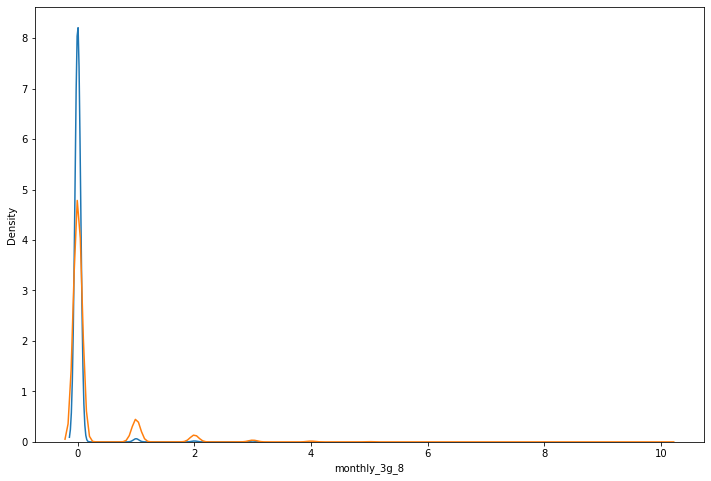

In [253]:
# Plotting the "monthly_3g_8" Predictor for churn and Non churn customers
fig = plt.figure(figsize=[12,8])
sns.distplot(Telecom_df_final_churn["monthly_3g_8"],label="churn",hist=False)
sns.distplot(Telecom_df_final_non_churn["monthly_3g_8"],label="not churn",hist=False)
plt.show()

### Insights
The number of monthly 3g data for August for the Churn customers are very much populated aroud 1, whereas of Non churn customers it spreaded accross various numbers.

Similarly, We can plot each variables, which have higher coefficients, Churn distribution.